In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np


In [2]:
# Define the paths
train_dir = "./Kaggle_Gender_classification_data/train"
test_dir = "./Kaggle_Gender_classification_data/test"
categories = ['Men','Women']


In [3]:
# Function to get all image paths with multiple extensions
def get_image_paths(directory):
    image_paths = []
    for category in categories:
        image_paths.extend(glob.glob(os.path.join(directory, category, '*.jpg')))
    
    return image_paths

# Get image paths for train and test
train_image_paths = get_image_paths(train_dir)
test_image_paths = get_image_paths(test_dir)

In [4]:
train_image_paths

['./Kaggle_Gender_classification_data/train\\Men\\00000001.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000002.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000003.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000004.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000005.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000006.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000007.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000008.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000009.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000010.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000011.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000012.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000013.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000014.jpg',
 './Kaggle_Gender_classification_data/train\\Men\\00000015.jpg',
 './Kaggle_Gender_classif

In [5]:
len(train_image_paths)

3228

In [6]:
len(test_image_paths)

20

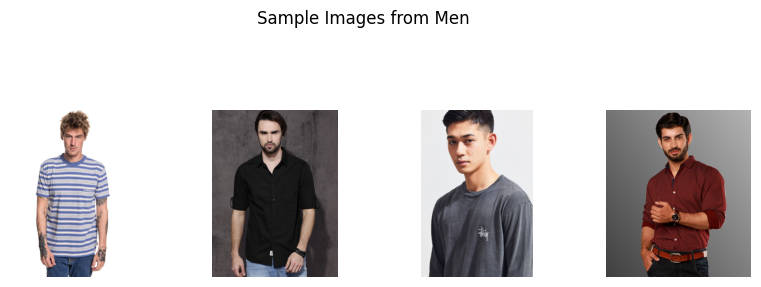

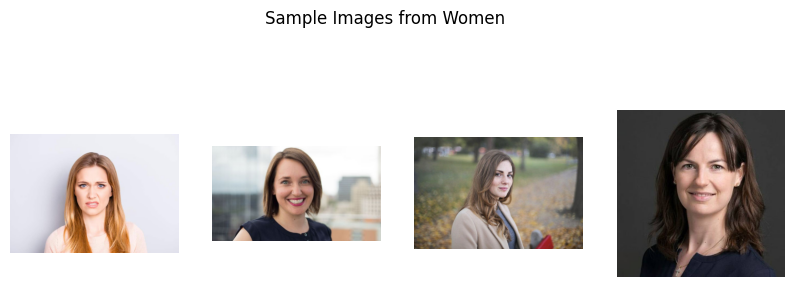

In [7]:
# Visualize the data - Plot grid sample of images
def plot_sample_images(image_paths, title, num_images=16):
    num_images = min(num_images, len(image_paths))  # Ensure we do not exceed the number of available images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        img = mpimg.imread(image_paths[i])
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


# Plot a few images from each class
for category in categories:
    sample_images = (glob.glob(os.path.join(train_dir, category, '*.jpg')))[:4]
    plot_sample_images(sample_images, f'Sample Images from {category}')

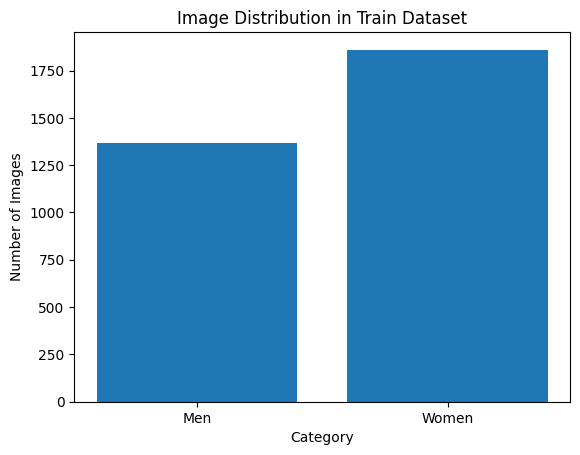

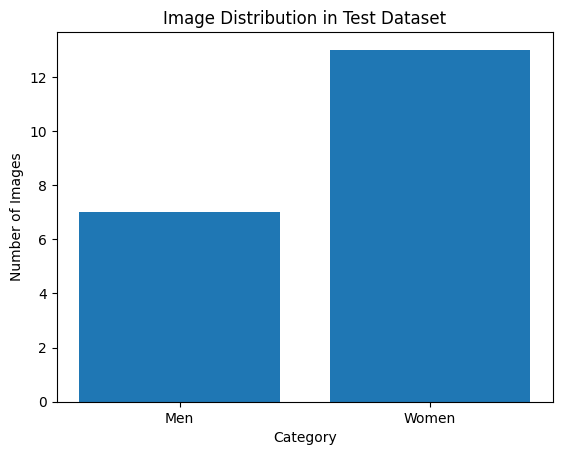

In [8]:
# Verify the count of images in each folder
from collections import Counter
def plot_image_distribution(image_paths, title):
    counts = Counter([os.path.basename(os.path.dirname(path)) for path in image_paths])
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.show()

plot_image_distribution(train_image_paths, 'Image Distribution in Train Dataset')
plot_image_distribution(test_image_paths, 'Image Distribution in Test Dataset')

In [9]:
# Check image dimensions
def check_image_dimensions(image_paths, num_images=4):
    num_images = min(num_images, len(image_paths))  # Ensure we do not exceed the number of available images
    for path in image_paths[:num_images]:
        img = mpimg.imread(path)
        print(f'{os.path.basename(path)}: {img.shape}')

print("Sample dimensions from 'Men':")
check_image_dimensions(glob.glob(os.path.join(train_dir, 'Men', '*.jpg')))

print("Sample dimensions from 'Women':")
check_image_dimensions(glob.glob(os.path.join(train_dir, 'Women', '*.jpg')))

Sample dimensions from 'Men':
00000001.jpg: (1500, 1117, 3)
00000002.jpg: (1440, 1080, 3)
00000003.jpg: (675, 450, 3)
00000004.jpg: (530, 459, 3)
Sample dimensions from 'Women':
00000000.jpg: (681, 968, 3)
00000001.jpg: (371, 660, 3)
00000002.jpg: (640, 960, 3)
00000003.jpg: (620, 620, 3)


In [10]:
image_size = (256, 256)
train_ds,val_ds=tf.keras.utils.image_dataset_from_directory(train_dir,label_mode = 'categorical',image_size = image_size,validation_split=0.2,subset='both',shuffle=True,batch_size=4,seed=42)
test_ds=tf.keras.utils.image_dataset_from_directory(test_dir,label_mode = 'categorical',image_size = image_size,batch_size=4)

Found 3532 files belonging to 2 classes.
Using 2826 files for training.
Using 706 files for validation.
Found 20 files belonging to 2 classes.


ClassNames: ['men', 'women']


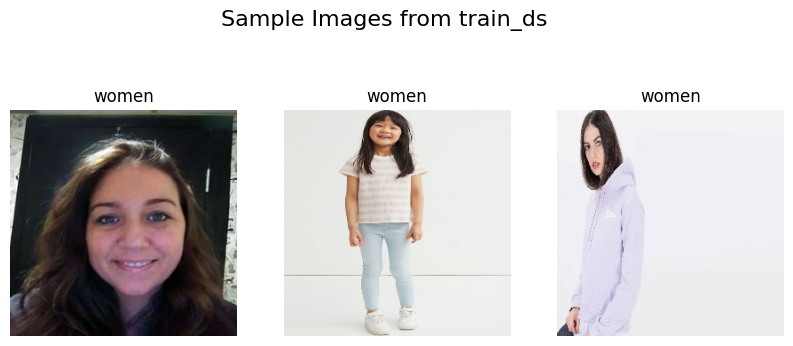

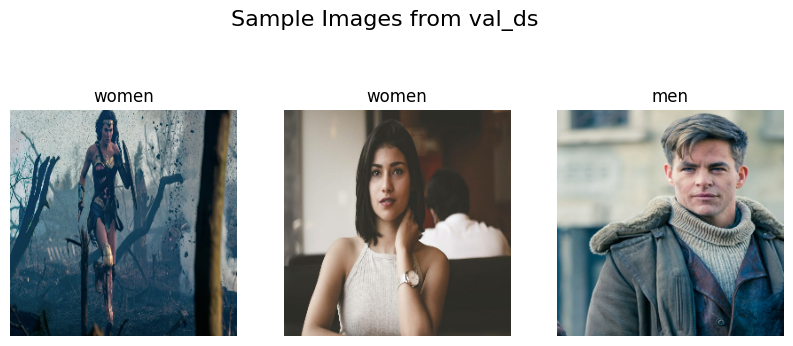

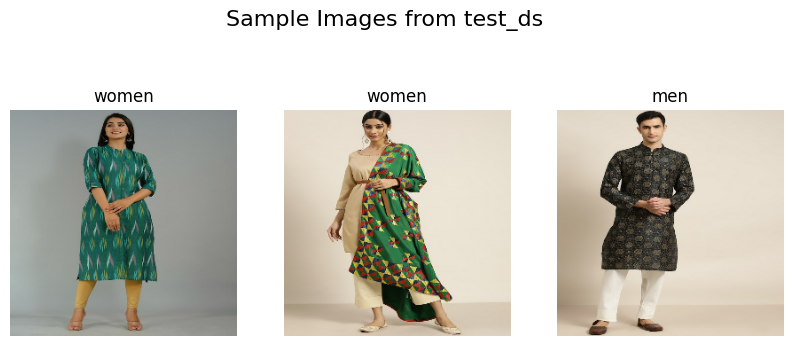

In [11]:
#NOw lets visualize these resized images
import matplotlib.pyplot as plt

# Define the classes
class_names = train_ds.class_names  # class names are the same for train_ds, val_ds, and test_ds
print(f"ClassNames: {class_names}")
# Function to visualize images from a dataset
def visualize_dataset(dataset, num_samples=3):
    # Only take the first batch from the dataset
    for images, labels in dataset.take(1):
        # Plot the images
        plt.figure(figsize=(10, 10))
        for i in range(num_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i]).numpy()])
            plt.axis("off")

# Visualize images from train_ds
visualize_dataset(train_ds)
plt.suptitle('Sample Images from train_ds', fontsize=16)
plt.show()

# Visualize images from val_ds
visualize_dataset(val_ds)
plt.suptitle('Sample Images from val_ds', fontsize=16)
plt.show()

# Visualize images from test_ds
visualize_dataset(test_ds)
plt.suptitle('Sample Images from test_ds', fontsize=16)
plt.show()


In [12]:
# Count the number of batches and retrieve the batch sizes

def count_batches_and_sizes(dataset):
    num_batches = tf.data.experimental.cardinality(dataset).numpy()
    batch_sizes = []
    for batch in dataset.take(1):  # Take one batch to inspect
        batch_sizes.append(batch[0].shape[0])  # Accessing the batch of images and getting batch size
    return num_batches, batch_sizes

# Count batches and sizes for train_ds
num_batches_train, batch_sizes_train = count_batches_and_sizes(train_ds)

# Count batches and sizes for val_ds
num_batches_val, batch_sizes_val = count_batches_and_sizes(val_ds)

# Count batches and sizes for test_ds
num_batches_test, batch_sizes_test = count_batches_and_sizes(test_ds)

# Print results
print(f"Number of batches in train_ds: {num_batches_train}, Batch sizes: {batch_sizes_train}")
print(f"Number of batches in val_ds: {num_batches_val}, Batch sizes: {batch_sizes_val}")
print(f"Number of batches in test_ds: {num_batches_test}, Batch sizes: {batch_sizes_test}")


Number of batches in train_ds: 707, Batch sizes: [4]
Number of batches in val_ds: 177, Batch sizes: [4]
Number of batches in test_ds: 5, Batch sizes: [4]


In [13]:
# Function to print dimensions (shape) of the first image in the first batch
def print_image_shape(dataset):
    for images, labels in dataset.take(1):  # Take the first batch
        first_image = images[0]
        print(f"First image shape: {first_image.shape}")

# Print dimensions of the first image in train_ds
print("Train dataset:")
print_image_shape(train_ds)

# Print dimensions of the first image in val_ds
print("\nValidation dataset:")
print_image_shape(val_ds)

# Print dimensions of the first image in test_ds
print("\nTest dataset:")
print_image_shape(test_ds)

Train dataset:
First image shape: (256, 256, 3)

Validation dataset:
First image shape: (256, 256, 3)

Test dataset:
First image shape: (256, 256, 3)


In [14]:
# Map class names to indices
class_name_to_index = {name: index for index, name in enumerate(class_names)}
print("Class Name to Index Mapping:", class_name_to_index)

Class Name to Index Mapping: {'men': 0, 'women': 1}


In [15]:
# Class weights: {class_index: weight}
class_weights = {0: 1.13, 1: 0.89}   

In [16]:
#Lets write function that helps us see the results after training
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
  ax = axes.flatten()  # Flatten the 2D array of axes into a 1D array

  #accuracy graph
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0, n_epochs), model_history.history['loss'], label='Train', color='b')
  ax[1].plot(range(0, n_epochs), model_history.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  # Plotting Precision
  ax[2].plot(range(0, n_epochs), [prec * 100 for prec in model_history.history['precision']], label='Train', color='b')
  ax[2].plot(range(0, n_epochs), [prec * 100 for prec in model_history.history['val_precision']], label='Val', color='r')
  ax[2].set_title('Precision vs. Epoch', fontsize=15)
  ax[2].set_ylabel('Precision (%)', fontsize=12)
  ax[2].set_xlabel('Epoch', fontsize=12)
  ax[2].legend()

  # Plotting Recall
  ax[3].plot(range(0, n_epochs), [rec * 100 for rec in model_history.history['recall']], label='Train', color='b')
  ax[3].plot(range(0, n_epochs), [rec * 100 for rec in model_history.history['val_recall']], label='Val', color='r')
  ax[3].set_title('Recall vs. Epoch', fontsize=15)
  ax[3].set_ylabel('Recall (%)', fontsize=12)
  ax[3].set_xlabel('Epoch', fontsize=12)
  ax[3].legend()

  # Adjust layout
  plt.tight_layout()
  #display the graph
  plt.show()

In [19]:
#Now lets use pretrained resnet model and finetune it for our task
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Model
 


# Load the pretrained InceptionV3 model, excluding the top layer
inception_base_model = InceptionV3(weights="imagenet", input_shape=(256, 256, 3), include_top=False)

# Freeze the layers of the base model to prevent them from being trained
for layer in inception_base_model.layers:
    layer.trainable = True

# Add custom layers on top of the base model
x = Flatten()(inception_base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Add the final output layer with softmax activation for classification
output = Dense(2, activation="softmax")(x)


gender_classifier = Model(inception_base_model.input, output, name="Gender_Classifier")
gender_classifier.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 1e-4), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy', 'Precision', 'Recall'])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

inception_history = gender_classifier.fit(train_ds, epochs=150, validation_data=val_ds,class_weight=class_weights, callbacks=[early_stopping_cb])


Epoch 1/150
707/707 [==============================] - 71s 92ms/step - loss: 0.7017 - accuracy: 0.6716 - precision: 0.6716 - recall: 0.6716 - val_loss: 0.4429 - val_accuracy: 0.8286 - val_precision: 0.8286 - val_recall: 0.8286
Epoch 2/150
707/707 [==============================] - 66s 93ms/step - loss: 0.6237 - accuracy: 0.7052 - precision: 0.7052 - recall: 0.7052 - val_loss: 0.4860 - val_accuracy: 0.7734 - val_precision: 0.7734 - val_recall: 0.7734
Epoch 3/150
707/707 [==============================] - 66s 94ms/step - loss: 0.6187 - accuracy: 0.7151 - precision: 0.7151 - recall: 0.7151 - val_loss: 0.3570 - val_accuracy: 0.8286 - val_precision: 0.8286 - val_recall: 0.8286
Epoch 4/150
707/707 [==============================] - 66s 94ms/step - loss: 0.5722 - accuracy: 0.7360 - precision: 0.7360 - recall: 0.7360 - val_loss: 0.4404 - val_accuracy: 0.7890 - val_precision: 0.7890 - val_recall: 0.7890
Epoch 5/150
707/707 [==============================] - 66s 93ms/step - loss: 0.6072 - accura

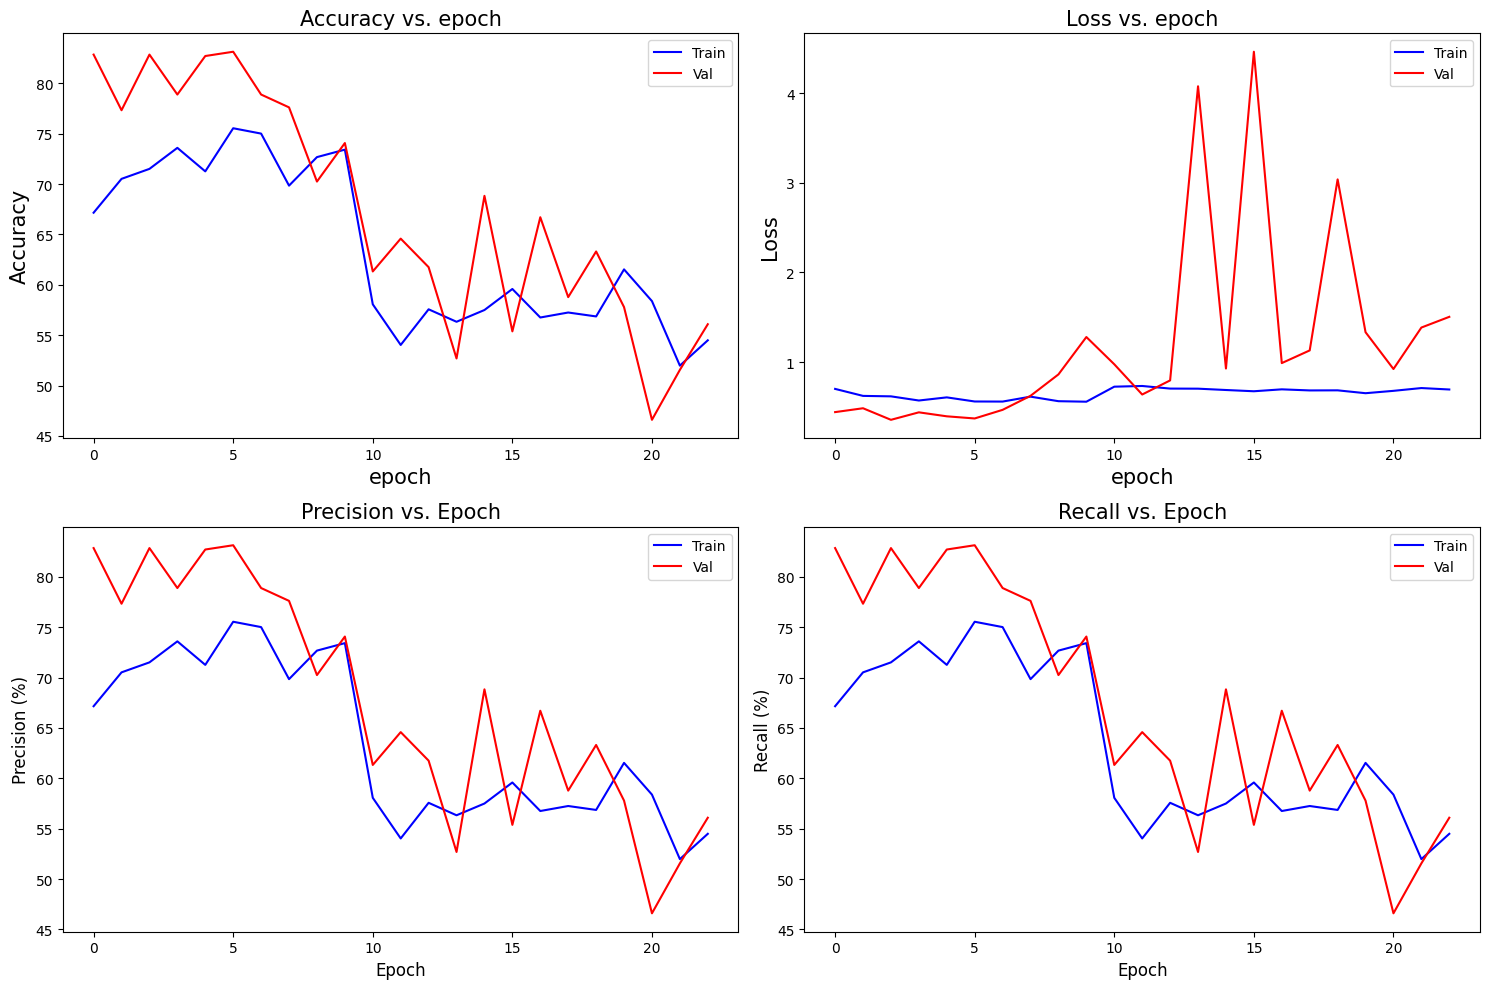

In [21]:
plot_acc_loss(inception_history, n_epochs = 23)

1/1 [==============================] - 0s 21ms/step


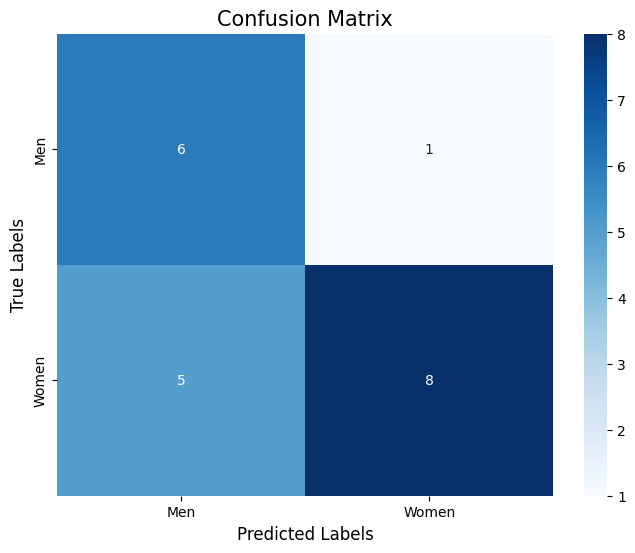

              precision    recall  f1-score   support

         Men     0.5455    0.8571    0.6667         7
       Women     0.8889    0.6154    0.7273        13

    accuracy                         0.7000        20
   macro avg     0.7172    0.7363    0.6970        20
weighted avg     0.7687    0.7000    0.7061        20



In [22]:
#Now lets see the results on test dataset
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Step 1: Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = gender_classifier.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#lets give the class names
class_names = ['Men','Women']

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 3: Plot the confusion matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Step 4: Print classification report with class names
class_report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(class_report)